In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers,Sequential,regularizers

In [2]:
data_dir="../data/images_original"
batch_size=32


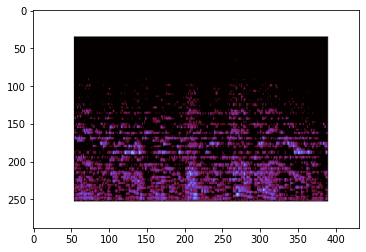

In [3]:
img=cv2.imread("../data/images_original/classical/classical00000.png")
plt.imshow(img)

In [4]:
img.shape

(288, 432, 3)

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 300),
  color_mode="grayscale",
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  color_mode="grayscale",
  image_size=(200, 300),
  batch_size=batch_size)

Found 900 files belonging to 9 classes.
Using 720 files for training.
Found 900 files belonging to 9 classes.
Using 180 files for validation.


In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16,3,activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9,activation="softmax")
])

In [14]:
model.compile(
  optimizer='adam',
  loss="sparse_categorical_crossentropy",
  metrics=['accuracy'])

In [15]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
23/23 [==============================] - 2s 52ms/step - loss: 5.8751 - accuracy: 0.1417 - val_loss: 2.4219 - val_accuracy: 0.1833
Epoch 2/30
23/23 [==============================] - 1s 40ms/step - loss: 2.1262 - accuracy: 0.1958 - val_loss: 2.0987 - val_accuracy: 0.2389
Epoch 3/30
23/23 [==============================] - 1s 40ms/step - loss: 1.9404 - accuracy: 0.2972 - val_loss: 2.0440 - val_accuracy: 0.2611
Epoch 4/30
23/23 [==============================] - 1s 40ms/step - loss: 1.7886 - accuracy: 0.3931 - val_loss: 1.9967 - val_accuracy: 0.2333
Epoch 5/30
23/23 [==============================] - 1s 40ms/step - loss: 1.5862 - accuracy: 0.4778 - val_loss: 2.0985 - val_accuracy: 0.2611
Epoch 6/30
23/23 [==============================] - 1s 41ms/step - loss: 1.4312 - accuracy: 0.4917 - val_loss: 1.9965 - val_accuracy: 0.3500
Epoch 7/30
23/23 [==============================] - 1s 40ms/step - loss: 1.2478 - accuracy: 0.5847 - val_loss: 1.8712 - val_accuracy: 0.3889
Epoch 8/30
23